In [97]:
import numpy as np
import subprocess as sp
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

from motors.plot import prepare_plot
from motors.plot import paper_plot
prepare_plot()

In [32]:
_, dihedral_values = np.genfromtxt('scan-input.txt', unpack=True)

In [33]:
_, energies = np.genfromtxt('scan-output.txt', unpack=True)

In [60]:
data = np.vstack((dihedral_values, energies))

In [72]:
data.sort(axis=1)

In [77]:
order = dihedral_values.argsort()

In [82]:
data = np.vstack((dihedral_values[order], energies[order]))

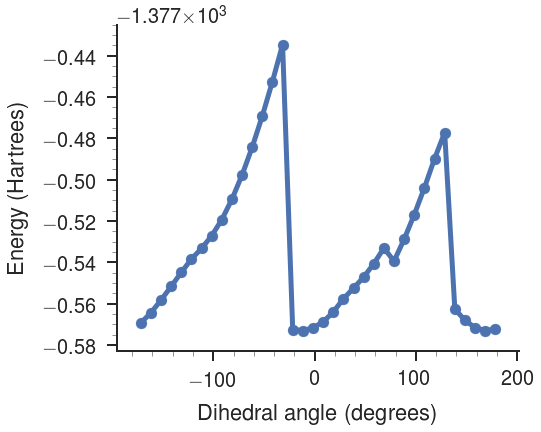

In [87]:
fig = plt.figure(figsize=(6 * 1.2, 6))
ax = plt.subplot()
ax.plot(data[0], data[1])
ax.scatter(data[0], data[1], s=120)
ax.set_xlabel('Dihedral angle (degrees)')
ax.set_ylabel('Energy (Hartrees)')
paper_plot(fig, scientific=False)

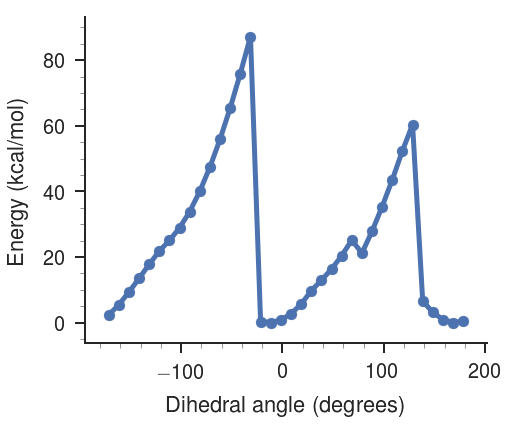

In [85]:
fig = plt.figure(figsize=(6 * 1.2, 6))
ax = plt.subplot()
ax.plot(data[0], data[1] * 630 - energies[0] * 630)
ax.scatter(data[0], data[1] * 630 - energies[0] * 630, s=120)
ax.set_xlabel('Dihedral angle (degrees)')
ax.set_ylabel('Energy (kcal/mol)')
paper_plot(fig)

Quick comparison betwen basis sets.

In [95]:
hf_631g = np.genfromtxt('../gaussian-torsion-scan-HF-631G/scan-output.txt')

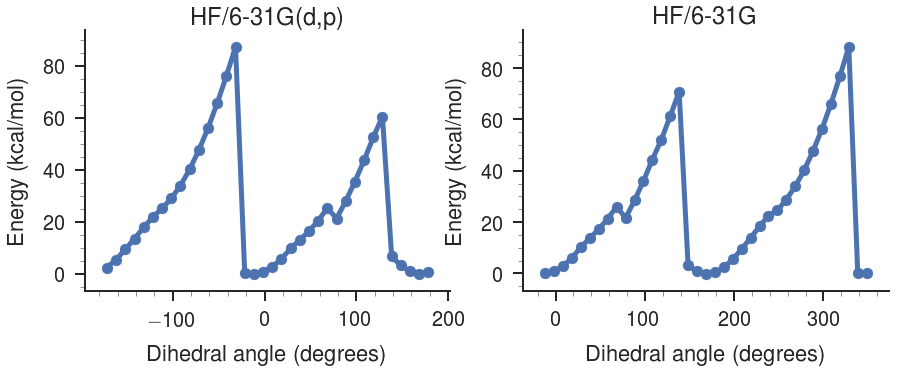

In [113]:
fig = plt.figure(figsize=(2 * 6 * 1.2, 6 * 2))
gs = GridSpec(2, 2, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

ax1.plot(data[0], data[1] * 630 - energies[0] * 630)
ax1.scatter(data[0], data[1] * 630 - energies[0] * 630, s=120)
ax1.set_xlabel('Dihedral angle (degrees)')
ax1.set_ylabel('Energy (kcal/mol)')
ax1.set_title('HF/6-31G(d,p)')

ax2 = plt.subplot(gs[0, 1])
ax2.plot(hf_631g[:, 0], hf_631g[:, 1] * 630 - hf_631g[0, 1] * 630)
ax2.scatter(hf_631g[:, 0], hf_631g[:, 1] * 630 - hf_631g[0, 1] * 630, s=120)
ax2.set_xlabel('Dihedral angle (degrees)')
ax2.set_ylabel('Energy (kcal/mol)')
ax2.set_title('HF/6-31G')

paper_plot(fig)